# **CNN Mnist with STM32Cube.AI**

현재 경로와 Keras 버전 확인하기

In [1]:
import os
import keras

current_directory = os.getcwd()
print("Current Directory Path : {}".format(current_directory))

current_version = keras.__version__
print("Current Keras Version : {}".format(current_version))

Current Directory Path : /content
Current Keras Version : 3.5.0


Keras 버전 변경하기

In [2]:
# STM32Cube.AI에서 지원하는 Keras Version으로 변겯하기.
!pip install tensorflow==2.11.0 keras==2.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 59.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: keras
    Found existing installation: kera

In [1]:
import os
import tensorflow as tf

current_directory = os.getcwd()
print("Current Directory Path : {}".format(current_directory))

current_version = tf.keras.__version__
print("Current Keras Version : {}".format(current_version))

Current Directory Path : /content
Current Keras Version : 2.11.0


라이브러리Import하기

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

Mnist 데이터 불러오기

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train shape = {} , y_train shape = {}".format(np.shape(x_train), np.shape(y_train)))
print("x_test shape = {}, y_test shape = {}".format(np.shape(x_test),np.shape(y_test)))


11490434/11490434 [==============================] - 2s 0us/step
x_train shape = (60000, 28, 28) , y_train shape = (60000,)
x_test shape = (10000, 28, 28), y_test shape = (10000,)


Mnist 이미지 그려보기

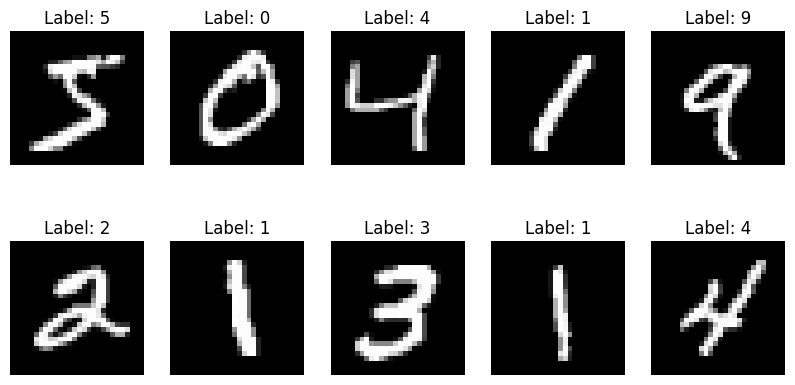

In [4]:
# Function to draw the images
def draw_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(10):  # Display the first 10 images
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title("Label: " + str(labels[i]))
        plt.axis('off')
    plt.show()

draw_images(x_train,y_train)

Normalization과 0 ~ 9 의 Class를 One hot vector로 변경하기

In [5]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train[0].shape)
print(type(x_train[0]))
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (28, 28, 1)
<class 'numpy.ndarray'>
60000 train samples
10000 test samples


Model 구성하기

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Model 학습 진행하기

In [7]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

# 학습된 모델을 .h5 파일로 저장
model.save("cnn_mnist.h5")

Epoch 1/15
469/469 [==============================] - 7s 14ms/step - loss: 0.3312 - accuracy: 0.9016 - val_loss: 0.0816 - val_accuracy: 0.9752
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.1040 - accuracy: 0.9686 - val_loss: 0.0510 - val_accuracy: 0.9834
Epoch 3/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0801 - accuracy: 0.9752 - val_loss: 0.0431 - val_accuracy: 0.9863
Epoch 4/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 5/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0586 - accuracy: 0.9823 - val_loss: 0.0345 - val_accuracy: 0.9882
Epoch 6/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 7/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0333 - val_accuracy: 0.9899

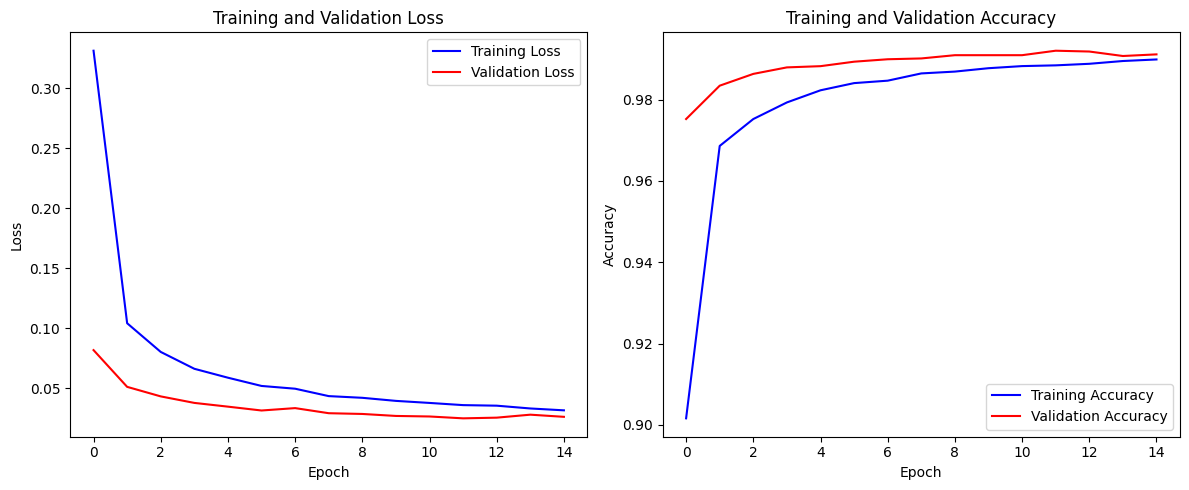

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Google Colab에서 그래프를 노트북 내에 표시
%matplotlib inline

# 학습 및 검증 곡선 그리기
plt.figure(figsize=(12, 5))

# 손실 곡선
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 곡선
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Model 평가하기

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026022454723715782
Test accuracy: 0.991100013256073


In [10]:
# 모델의 첫 번째 레이어를 가져옵니다.
first_layer = model.layers[0]

# 첫 번째 레이어의 Input shape을 확인합니다.
input_shape = first_layer.input_shape
print("Input shape:", input_shape)

Input shape: (None, 28, 28, 1)


새로운 이미지를 Model에 적용하기

In [11]:
from PIL import Image

def load_8bit_bmp(file_path):
    try:
        # BMP 파일 열기
        with Image.open(file_path) as img:
            # 이미지가 8비트 모드인지 확인
            #if img.mode != 'P':
               # raise ValueError("이미지가 8비트 형식이 아닙니다.")

            # 픽셀 데이터 가져오기
            pixel_data = list(img.getdata())

            # 이미지 크기
            width, height = img.size

            # 픽셀 데이터를 2차원 리스트로 변환
            pixel_matrix = [pixel_data[i:i+width] for i in range(0, len(pixel_data), width)]

            return pixel_matrix

    except Exception as e:
        print("오류 발생:", str(e))
        return None

pixel_matrix = load_8bit_bmp("_2.bmp")
pixel_matrix2 = np.array(pixel_matrix, dtype=np.float32)
pixel_matrix2 /= 255.0

pixel_matrix2 = pixel_matrix2.reshape(1,28,28,1)
print(type(pixel_matrix2))
print(np.shape(pixel_matrix2))

<class 'numpy.ndarray'>
(1, 28, 28, 1)


In [12]:
from keras.models import load_model
import tensorflow as tf

# Load the pre-trained model
model = load_model('cnn_mnist.h5')  # Replace 'path_to_saved_model.h5' with the actual path to your saved model.

print(x_train[0].shape)
predictions = model.predict(pixel_matrix2)
predicted_classes = np.argmax(predictions, axis=1)

print(predictions)
print("Hand write number is :", predicted_classes)

# Decode the numeric predictions back to original class labels
#predicted_labels = encoder.inverse_transform(predicted_classes)


(28, 28, 1)
1/1 [==============================] - 0s 87ms/step
[[1.9463056e-09 2.9451945e-07 9.9998105e-01 1.5727341e-05 7.0455430e-10
  1.2536004e-10 5.0112386e-11 2.8363111e-06 1.5669953e-07 2.5127469e-09]]
Hand write number is : [2]
